Using TensorFlow backend.


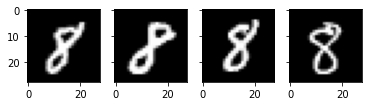

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train,G_train),(X_test,G_test) = mnist.load_data()
idx_4 = np.where(G_train==8)
X=X_train[idx_4,:,:]
X = X[0,:,:,:]
X = X.reshape(X.shape[0],28*28)

fig, axs = plt.subplots(1, 4,sharex=True, sharey=True)
for i in range(4):
    axs[i].imshow(X[i,:].reshape((28,28)), cmap="gray")


Text(0.5, 1.0, '$\\mathbf{v}_2$')

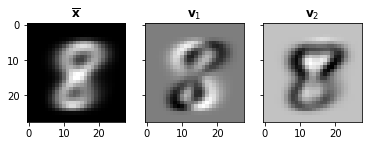

In [5]:
import numpy.matlib

x_bar = X.sum(axis=0)/X.shape[0]
#x_bar = x_bar.reshape((1,256))
U,D,V_transp = np.linalg.svd(X-x_bar,full_matrices=False)
V=V_transp.T

fig, axs = plt.subplots(1, 3,sharex=True, sharey=True)
axs[0].imshow(x_bar.reshape((28,28)),cmap="gray")
axs[1].imshow(V[:,0].reshape((28,28)),cmap="gray")
axs[2].imshow(V[:,1].reshape((28,28)),cmap="gray")
axs[0].set_title("$\overline{\mathbf{x}}$")
axs[1].set_title("$\mathbf{v}_1$")
axs[2].set_title("$\mathbf{v}_2$")

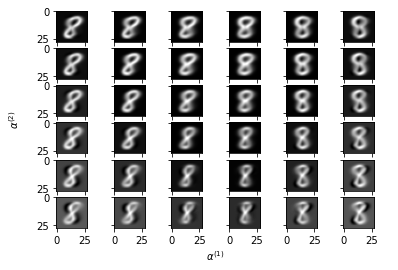

In [3]:
fig, axs = plt.subplots(6, 6,sharex=True, sharey=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("$\\alpha^{(1)}$")
plt.ylabel("$\\alpha^{(2)}$")

alpha1=np.linspace(-1000,1000,6)
alpha2=np.linspace(-1000,1000,6)
for i in range(6):
    for j in range(6):
        x =x_bar.T+alpha1[i]*V[:,0]+alpha2[j]*V[:,1]
        axs[j, i].imshow(x.reshape((28,28)), cmap="gray")
